## **Library**

Pada tahap ini, dilakukan proses **import library** yang diperlukan untuk mendukung pengolahan data, visualisasi, dan implementasi machine learning. Penjelasan masing-masing library adalah sebagai berikut:  
1. **`pandas`**: Digunakan untuk mengelola dan memanipulasi data dalam format tabel seperti DataFrame.  
2. **`IPython.display.display`**: Membantu menampilkan output, seperti tabel atau data lainnya, dengan format yang lebih informatif dan terorganisir di lingkungan Jupyter Notebook.  
3. **`matplotlib.pyplot`**: Library visualisasi data yang digunakan untuk membuat grafik atau plot.  
4. **`numpy`**: Digunakan untuk operasi komputasi numerik seperti array multidimensi dan fungsi matematika tingkat lanjut.  
5. **`sklearn.model_selection.train_test_split`**: Digunakan untuk membagi dataset menjadi subset data pelatihan dan pengujian.  
6. **`sklearn.ensemble.RandomForestRegressor`**: Model machine learning berbasis ensemble yang digunakan untuk regresi, memanfaatkan algoritma Random Forest.  
7. **`sklearn.metrics.mean_squared_error`**: Digunakan untuk mengevaluasi kinerja model regresi berdasarkan kesalahan kuadrat rata-rata (MSE).  
8. **`warnings`**: Library bawaan Python yang digunakan untuk menangani peringatan (warnings).  
9. **`sklearn.exceptions.ConvergenceWarning`**: Menangkap jenis peringatan tertentu yang muncul saat model belum mencapai konvergensi optimal.  

Baris terakhir, `warnings.filterwarnings`, digunakan untuk **menonaktifkan peringatan** yang berhubungan dengan "UserWarning" untuk memastikan eksekusi program berjalan lebih bersih tanpa gangguan dari pesan peringatan yang tidak relevan.

In [1]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=UserWarning)

## **Dataset**

Pada tahap ini, dilakukan proses **pembacaan data** dari file CSV yang diambil melalui URL: https://panelharga.badanpangan.go.id/harga-eceran. Data tersebut dibaca menggunakan fungsi `pd.read_csv` dari library `pandas`, yang akan mengubah data dalam format CSV menjadi sebuah DataFrame. Data ini akan menjadi sumber utama untuk proses analisis dan prediksi selanjutnya.

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/kangdconqueror/dataset/refs/heads/master/export-eceran.csv")

Dilakukan proses **eksplorasi struktur data** menggunakan metode `data.info()` dari library `pandas`. Hasilnya memberikan informasi berikut:  
1. **Tipe data**: Dataset merupakan objek `DataFrame` dengan 2 baris (entries) dan 1054 kolom.  
2. **Nama kolom**: Kolom pertama diberi nama `Komoditas (Rp)` dan kolom terakhir adalah `18/11/2024`.  
3. **Tipe data per kolom**:  
   - Sebanyak 951 kolom bertipe `int64`, menunjukkan data numerik.  
   - Sebanyak 103 kolom bertipe `object`, menunjukkan data berupa teks atau campuran.  
4. **Penggunaan memori**: Dataset ini membutuhkan sekitar 16.6 KB memori.  

Informasi ini membantu memahami ukuran dataset, struktur, dan tipe data pada setiap kolom untuk langkah pra-pemrosesan berikutnya.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Columns: 1054 entries,  Komoditas (Rp)  to 18/11/2024
dtypes: int64(951), object(103)
memory usage: 16.6+ KB


Dilakukan proses **menampilkan data awal** menggunakan metode `data.head()` dari library `pandas`. Metode ini digunakan untuk melihat lima baris pertama dari dataset secara default. Tujuannya adalah:  
1. **Memahami struktur dataset**: Melihat format data dalam setiap kolom, seperti nama kolom, tipe data, dan contoh nilai.  
2. **Memverifikasi data**: Memastikan bahwa data telah berhasil diimpor dengan benar tanpa adanya error atau anomali.  
3. **Identifikasi awal**: Mengamati pola atau ciri khas dari data yang tersedia untuk menentukan langkah pra-pemrosesan selanjutnya.  

Hasil ini memberikan gambaran umum tentang dataset sebelum dilakukan kegiatan transformasi dataset agar dapat lebih mudah digunakan untuk analisa berikutnya.

In [4]:
data.head()

,Komoditas (Rp),01/01/2022,02/01/2022,03/01/2022,04/01/2022,05/01/2022,06/01/2022,07/01/2022,08/01/2022,09/01/2022,...,09/11/2024,10/11/2024,11/11/2024,12/11/2024,13/11/2024,14/11/2024,15/11/2024,16/11/2024,17/11/2024,18/11/2024
0,Beras Premium,12000,12000,12000,12000,12000,12000,12000,12000,12000,...,15000,15000,15000,15000,15000,15000,15000,15000,15000,15000
1,Beras Medium,10000,10000,10000,10000,10000,10000,10000,10000,10000,...,13000,13000,13000,13000,13000,13000,13000,13000,13000,13000


## **Transform Data**

Pada tahap ini, dilakukan proses **pra-pemrosesan data** untuk mempersiapkan dataset agar lebih terstruktur dan siap digunakan dalam analisis lebih lanjut. Langkah-langkah yang dilakukan adalah sebagai berikut:

1. **Menghapus spasi tambahan pada nama kolom**:  
   - Dilakukan dengan metode `str.strip()` untuk memastikan nama kolom bersih dari karakter spasi yang mungkin memengaruhi proses manipulasi data.

2. **Transformasi data menggunakan `pd.melt()`**:  
   - Data diubah dari format wide (kolom tanggal terpisah) menjadi format long dengan struktur tiga kolom:  
     - `komoditas`: Menyimpan jenis komoditas.  
     - `tanggal`: Menyimpan tanggal sebagai variabel baru.  
     - `harga`: Menyimpan nilai harga.

3. **Penggantian nama kolom**:  
   - Kolom `Komoditas (Rp)` diubah menjadi `komoditas` agar lebih konsisten dan mudah digunakan.

4. **Konversi kolom `tanggal` ke format datetime**:  
   - Dilakukan menggunakan `pd.to_datetime()` dengan format `%d/%m/%Y`. Hal ini bertujuan agar kolom tanggal dapat dimanipulasi lebih lanjut dalam analisis waktu.

5. **Ekstraksi bulan dan tahun dari kolom tanggal**:  
   - Dua kolom baru, `tahun` dan `bulan`, ditambahkan untuk mempermudah analisis berbasis waktu.

6. **Konversi kolom `harga` ke integer**:  
   - Dilakukan menggunakan `pd.to_numeric()` untuk mengonversi nilai harga menjadi tipe data numerik. Nilai yang tidak valid diubah menjadi 0 dengan `fillna(0)` sebelum dikonversi ke `int`.

Hasil dari langkah-langkah ini adalah dataset yang lebih terorganisir dengan format long dan siap untuk analisis serta visualisasi lebih lanjut.

In [5]:
data.columns = data.columns.str.strip()

data_transformed = pd.melt(
    data,
    id_vars=["Komoditas (Rp)"],
    var_name="tanggal",
    value_name="harga"
)

data_transformed.rename(columns={"Komoditas (Rp)": "komoditas"}, inplace=True)

data_transformed['tanggal'] = pd.to_datetime(data_transformed['tanggal'], format='%d/%m/%Y')
data_transformed['tahun'] = data_transformed['tanggal'].dt.year
data_transformed['bulan'] = data_transformed['tanggal'].dt.month
data_transformed['harga'] = pd.to_numeric(data_transformed['harga'], errors='coerce').fillna(0).astype(int)

Dilakukan proses **menampilkan data awal** dari DataFrame hasil transformasi (`data_transformed`) menggunakan metode `head()`. Metode ini bertujuan untuk menampilkan lima baris pertama dari dataset yang telah diproses. Hasil yang diperoleh memberikan gambaran struktur dataset setelah transformasi:  

1. **Kolom `komoditas`**: Berisi jenis komoditas yang dianalisis.  
2. **Kolom `tanggal`**: Berisi tanggal dalam format datetime, hasil konversi dari kolom sebelumnya.  
3. **Kolom `harga`**: Berisi harga komoditas, yang telah dikonversi menjadi tipe data numerik (integer).  
4. **Kolom `tahun` dan `bulan`**: Kolom tambahan yang dihasilkan dari ekstraksi informasi waktu dari kolom `tanggal`.  

Langkah ini memastikan bahwa dataset sudah terstruktur dengan baik sesuai kebutuhan analisis dan prediksi.

In [6]:
data_transformed.head()

,komoditas,tanggal,harga,tahun,bulan
0,Beras Premium,2022-01-01,12000,2022,1
1,Beras Medium,2022-01-01,10000,2022,1
2,Beras Premium,2022-01-02,12000,2022,1
3,Beras Medium,2022-01-02,10000,2022,1
4,Beras Premium,2022-01-03,12000,2022,1


## **Info Data**

Dilakukan proses **eksplorasi struktur dataset hasil transformasi** menggunakan metode `data_transformed.info()`. Informasi yang diperoleh mencakup:  

1. **Tipe data**: Dataset berupa objek `DataFrame` dengan jumlah kolom dan baris hasil dari transformasi.  
2. **Nama kolom**: Kolom-kolom utama dalam dataset adalah:  
   - `komoditas` (tipe `object`): Menyimpan nama komoditas.  
   - `tanggal` (tipe `datetime64[ns]`): Menyimpan tanggal dengan format waktu.  
   - `harga` (tipe `int64`): Menyimpan nilai harga komoditas dalam bentuk numerik.  
   - `tahun` (tipe `int64`): Menyimpan informasi tahun yang diekstrak dari kolom `tanggal`.  
   - `bulan` (tipe `int64`): Menyimpan informasi bulan yang diekstrak dari kolom `tanggal`.  
3. **Jumlah baris**: Total jumlah baris yang mencerminkan data dari semua komoditas dan tanggal.  
4. **Penggunaan memori**: Total penggunaan memori dataset setelah transformasi.  

Langkah ini membantu memastikan dataset hasil transformasi memiliki tipe data dan struktur yang sesuai untuk analisis berikutnya.

In [7]:
data_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   komoditas  2106 non-null   object        
 1   tanggal    2106 non-null   datetime64[ns]
 2   harga      2106 non-null   int64         
 3   tahun      2106 non-null   int32         
 4   bulan      2106 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(1)
memory usage: 65.9+ KB


Dilakukan proses **analisis statistik deskriptif** menggunakan metode `data_transformed.describe()`. Metode ini memberikan ringkasan statistik untuk kolom numerik dalam dataset, yang meliputi:  

1. **Count**: Jumlah data non-null dalam setiap kolom numerik (`harga`, `tahun`, `bulan`).  
2. **Mean**: Nilai rata-rata dari kolom numerik, memberikan gambaran nilai tengah.  
3. **Standard Deviation (std)**: Mengukur seberapa tersebar nilai-nilai data terhadap rata-rata.  
4. **Minimum (min)**: Nilai terkecil dalam kolom numerik.  
5. **Percentile (25%, 50%, 75%)**: Mengindikasikan distribusi data, termasuk median (50%).  
6. **Maximum (max)**: Nilai terbesar dalam kolom numerik.  

Hasil ini memberikan gambaran umum distribusi data numerik pada dataset, seperti rentang harga komoditas, variasi data, dan pola distribusi waktu (tahun dan bulan).

In [8]:
data_transformed.describe()

,tanggal,harga,tahun,bulan
count,2106,2106.000000,2106.000000,2106.000000
mean,2023-06-11 00:00:00.000000256,11445.517569,2022.960114,6.309592
min,2022-01-01 00:00:00,0.000000,2022.000000,1.000000
25%,2022-09-21 00:00:00,11000.000000,2022.000000,3.000000
50%,2023-06-11 00:00:00,12500.000000,2023.000000,6.000000
75%,2024-02-29 00:00:00,13500.000000,2024.000000,9.000000
max,2024-11-18 00:00:00,17000.000000,2024.000000,12.000000
std,NaN,4109.978673,0.807521,3.351048


## **Cleansing Data**

Dilakukan proses **pembersihan data** untuk memastikan kolom `harga` memiliki nilai valid dan dapat dianalisis. Langkah-langkah yang dilakukan adalah sebagai berikut:

1. **Membersihkan kolom `harga`**:  
   - Koma (`,`) dan spasi (` `) dalam nilai harga dihapus menggunakan `replace()` dengan parameter `regex=True`.  
   - Nilai dalam kolom `harga` dikonversi menjadi tipe numerik menggunakan `pd.to_numeric()`. Nilai yang tidak valid secara otomatis diubah menjadi `NaN` dengan parameter `errors='coerce'`.

2. **Menghapus baris dengan nilai `NaN` pada kolom `harga`**:  
   - Baris yang mengandung `NaN` dihapus menggunakan metode `dropna()` pada subset kolom `harga`.

3. **Menghapus baris dengan nilai 0 pada kolom `harga`**:  
   - Baris dengan nilai harga `0` dihapus untuk memastikan hanya data harga yang bermakna yang digunakan dalam analisis.

Hasil dari proses ini adalah dataset baru (`data_transformed_clean`) yang lebih bersih, hanya berisi nilai harga yang valid dan tidak kosong. Dataset ini siap untuk digunakan dalam analisis dan model prediksi.

In [9]:
data_transformed['harga'] = data_transformed['harga'].replace({',': '', ' ': ''}, regex=True)
data_transformed['harga'] = pd.to_numeric(data_transformed['harga'], errors='coerce')
data_transformed_clean = data_transformed.dropna(subset=['harga'])
data_transformed_clean = data_transformed_clean[data_transformed_clean['harga'] != 0]

Dilakukan proses **analisis statistik deskriptif** pada dataset yang telah dibersihkan (`data_transformed_clean`) menggunakan metode `describe()`. Metode ini memberikan ringkasan statistik untuk kolom numerik yang tersisa dalam dataset, yang meliputi:  

1. **Count**: Jumlah data non-null dalam setiap kolom numerik (`harga`, `tahun`, `bulan`).  
2. **Mean**: Nilai rata-rata dari kolom numerik, memberikan gambaran nilai tengah harga komoditas dan distribusi waktu.  
3. **Standard Deviation (std)**: Mengukur seberapa besar variasi atau penyebaran data harga dan waktu dari nilai rata-rata.  
4. **Minimum (min)**: Nilai terkecil yang terdapat dalam kolom numerik, menunjukkan harga terendah yang tercatat dalam dataset.  
5. **Percentile (25%, 50%, 75%)**: Mengindikasikan distribusi data pada kuartil pertama (25%), median (50%), dan kuartil ketiga (75%).  
6. **Maximum (max)**: Nilai terbesar yang terdapat dalam kolom numerik, menunjukkan harga tertinggi yang tercatat.

Hasil ini memberikan gambaran yang lebih jelas tentang distribusi harga setelah pembersihan data, serta memberikan wawasan lebih lanjut terkait variasi dan rentang harga komoditas yang dianalisis.

In [10]:
data_transformed_clean.describe()

,tanggal,harga,tahun,bulan
count,1902,1902.000000,1902.000000,1902.000000
mean,2023-06-29 05:25:33.123028224,12673.112513,2023.005258,6.364879
min,2022-01-01 00:00:00,10000.000000,2022.000000,1.000000
25%,2022-10-17 06:00:00,11250.000000,2022.000000,3.000000
50%,2023-07-13 00:00:00,12500.000000,2023.000000,6.000000
75%,2024-03-20 18:00:00,14500.000000,2024.000000,9.000000
max,2024-11-18 00:00:00,17000.000000,2024.000000,12.000000
std,NaN,1771.721550,0.809578,3.407203


Dilakukan proses **menampilkan data awal** dari dataset yang telah dibersihkan (`data_transformed_clean`) menggunakan metode `head()`. Metode ini akan menampilkan lima baris pertama dari dataset yang sudah tidak mengandung nilai `NaN` atau `0` pada kolom `harga`. Hal ini bertujuan untuk:

1. **Verifikasi pembersihan data**: Memastikan bahwa baris yang mengandung nilai tidak valid telah berhasil dihapus.
2. **Menampilkan contoh data**: Memberikan gambaran awal mengenai struktur data yang telah dibersihkan, termasuk kolom `komoditas`, `tanggal`, `harga`, `tahun`, dan `bulan`.
3. **Memastikan konsistensi data**: Memeriksa apakah dataset sekarang sudah terstruktur dengan benar, dengan nilai harga yang valid dan kolom waktu yang sesuai.

Hasil ini memungkinkan untuk memverifikasi bahwa pembersihan data telah dilakukan dengan benar dan dataset siap untuk analisis lebih lanjut.

In [11]:
data_transformed_clean.head()

,komoditas,tanggal,harga,tahun,bulan
0,Beras Premium,2022-01-01,12000,2022,1
1,Beras Medium,2022-01-01,10000,2022,1
2,Beras Premium,2022-01-02,12000,2022,1
3,Beras Medium,2022-01-02,10000,2022,1
4,Beras Premium,2022-01-03,12000,2022,1


## **Penjelasan Variabel**
### 1. **komoditas**
   - **Tipe**: `string` (atau `object` dalam Pandas)
   - **Deskripsi**: Menyimpan nama komoditas yang harga per kilogramnya tercatat dalam dataset. Misalnya, nama-nama seperti "Beras Premium", "Beras Medium", atau komoditas pangan lainnya.
   
### 2. **tanggal**
   - **Tipe**: `datetime`
   - **Deskripsi**: Menyimpan tanggal spesifik dari data harga yang tercatat. Formatnya adalah `YYYY-MM-DD` (misalnya, `2022-01-01`). Kolom ini digunakan untuk menunjukkan kapan harga tercatat dan digunakan untuk analisis berdasarkan waktu (bulan, tahun).

### 3. **harga**
   - **Tipe**: `numeric` (integer atau float)
   - **Deskripsi**: Menyimpan harga per unit (biasanya per kilogram) untuk masing-masing komoditas pada tanggal tertentu. Nilai-nilai dalam kolom ini adalah angka yang menunjukkan harga yang dicatat. Data ini telah dibersihkan untuk memastikan tidak ada nilai yang tidak valid atau non-numerik.

### 4. **tahun**
   - **Tipe**: `integer`
   - **Deskripsi**: Menyimpan informasi tahun dari masing-masing tanggal harga. Variabel ini dihasilkan dari ekstraksi tahun dari kolom `tanggal`, yang digunakan untuk analisis berdasarkan tahun.

### 5. **bulan**
   - **Tipe**: `integer`
   - **Deskripsi**: Menyimpan informasi bulan (dalam angka 1-12, dengan 1 = Januari, 2 = Februari, dst.) dari masing-masing tanggal harga. Variabel ini dihasilkan dari ekstraksi bulan dari kolom `tanggal`, yang memudahkan analisis berdasarkan bulan dalam setahun.

---

### Ringkasan:
- **komoditas**: Nama jenis komoditas yang harga tercatat.
- **tanggal**: Tanggal harga tercatat.
- **harga**: Harga per unit dari komoditas tersebut pada tanggal yang dicatat.
- **tahun**: Tahun dari tanggal harga.
- **bulan**: Bulan dari tanggal harga.


## **Visualisasi Data**

### **Analisis Pergerakan Harga Beras Premium dan Medium Per Tahun**

Langkah ini memvisualisasikan pergerakan harga beras Premium dan Medium per bulan dari tahun 2022 hingga 2024. Proses yang dilakukan:

1. **Filter Data**: Data dipisahkan berdasarkan komoditas (`Beras Premium` dan `Beras Medium`).
2. **Rata-rata Bulanan**: Menghitung rata-rata harga per bulan dan tahun untuk masing-masing komoditas.
3. **Plot Grafik**: Dua grafik digambar, satu untuk harga Beras Premium dan satu untuk Beras Medium, dengan menampilkan pergerakan harga tiap tahun (2022-2024) pada sumbu bulan.

Grafik ini memberikan gambaran jelas tentang fluktuasi harga beras di kedua jenis komoditas selama periode yang dianalisis.

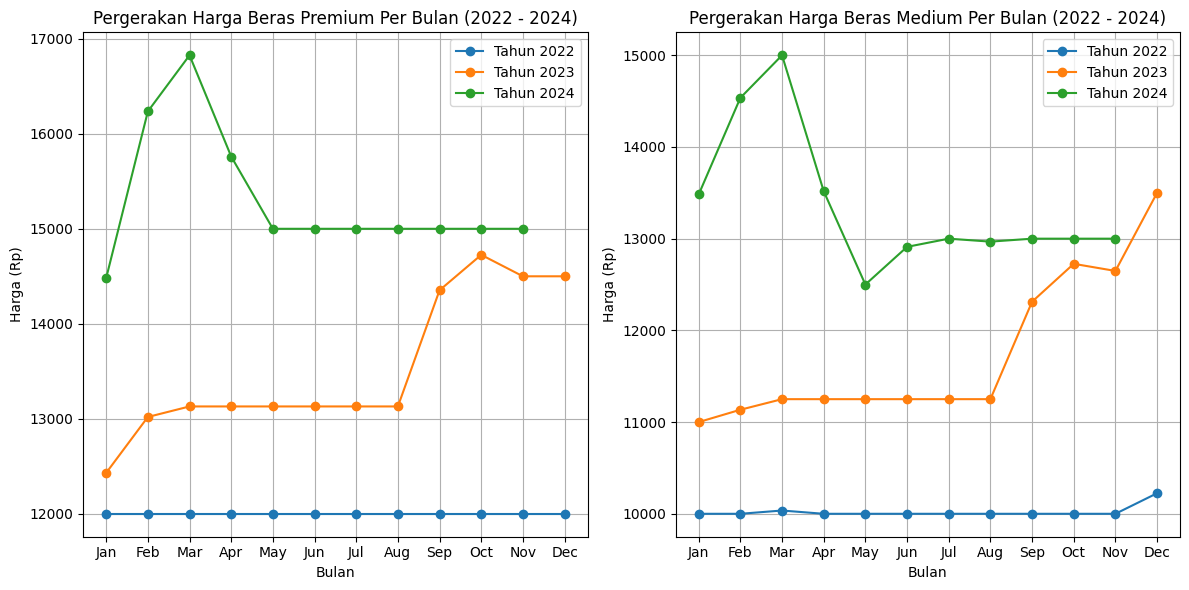

In [12]:
beras_premium = data_transformed_clean[data_transformed_clean['komoditas'] == 'Beras Premium']
beras_medium = data_transformed_clean[data_transformed_clean['komoditas'] == 'Beras Medium']

beras_premium_monthly_avg = beras_premium.groupby(['tahun', 'bulan']).agg({'harga': 'mean'}).reset_index()
beras_medium_monthly_avg = beras_medium.groupby(['tahun', 'bulan']).agg({'harga': 'mean'}).reset_index()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
for year in [2022, 2023, 2024]:
    data_year = beras_premium_monthly_avg[beras_premium_monthly_avg['tahun'] == year]
    plt.plot(data_year['bulan'], data_year['harga'], marker='o', label=f'Tahun {year}')
plt.title('Pergerakan Harga Beras Premium Per Bulan (2022 - 2024)')
plt.xlabel('Bulan')
plt.ylabel('Harga (Rp)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
for year in [2022, 2023, 2024]:
    data_year = beras_medium_monthly_avg[beras_medium_monthly_avg['tahun'] == year]
    plt.plot(data_year['bulan'], data_year['harga'], marker='o', label=f'Tahun {year}')
plt.title('Pergerakan Harga Beras Medium Per Bulan (2022 - 2024)')
plt.xlabel('Bulan')
plt.ylabel('Harga (Rp)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### **Perbandingan harga beras premium dan medium per bulan**

Pada langkah ini, dilakukan **perbandingan harga beras Premium dan Medium per bulan** untuk tahun 2022 hingga 2024. Proses yang dilakukan:

1. **Rata-rata Bulanan**: Menghitung rata-rata harga beras Premium dan Medium per bulan untuk setiap tahun.
2. **Plot Grafik**: Tiga grafik disusun per tahun (2022, 2023, 2024) untuk menunjukkan perbandingan harga kedua jenis beras. Setiap grafik menampilkan harga rata-rata beras Premium dan Medium per bulan.

Grafik ini memudahkan perbandingan tren harga antara kedua jenis beras selama periode yang dianalisis.

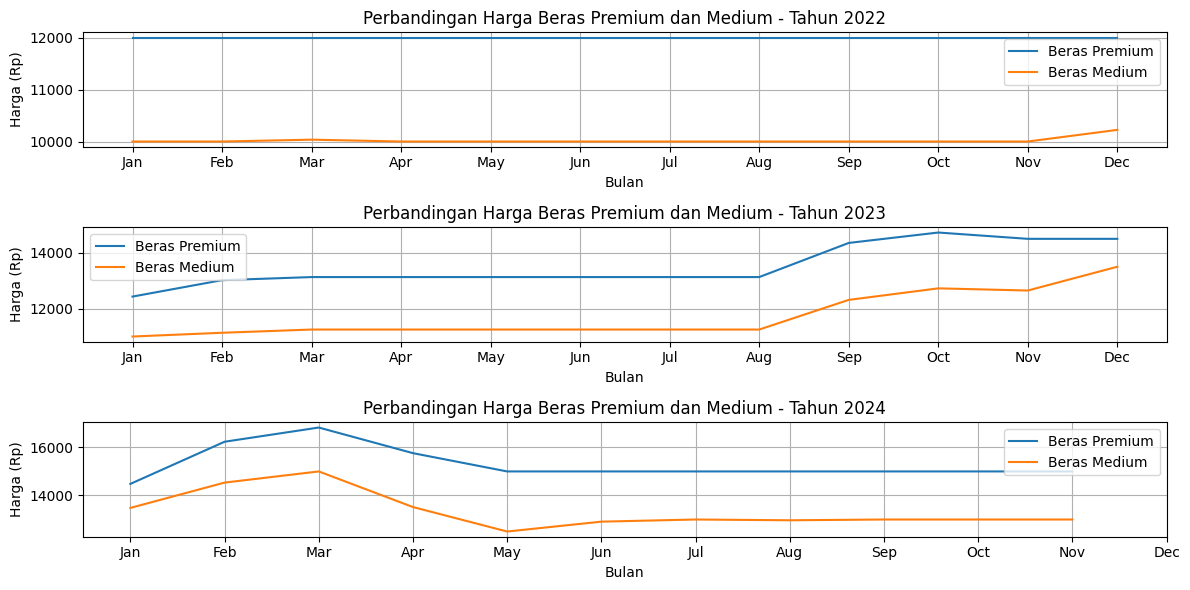

In [13]:
monthly_avg_both = data_transformed_clean.groupby(['tahun', 'bulan', 'komoditas'])['harga'].mean().reset_index()

plt.figure(figsize=(12, 6))

years = [2022, 2023, 2024]

for year in years:
    plt.subplot(3, 1, years.index(year) + 1)
    for komoditas in ['Beras Premium', 'Beras Medium']:
        komoditas_data = monthly_avg_both[(monthly_avg_both['tahun'] == year) & (monthly_avg_both['komoditas'] == komoditas)]
        plt.plot(komoditas_data['bulan'], komoditas_data['harga'], label=komoditas)

    plt.title(f'Perbandingan Harga Beras Premium dan Medium - Tahun {year}')
    plt.xlabel('Bulan')
    plt.ylabel('Harga (Rp)')
    plt.legend()
    plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    plt.grid(True)

plt.tight_layout()
plt.show()

### **Menentukan pada bulan berapa harga beras tertinggi**

Langkah ini bertujuan untuk **menentukan bulan dengan harga tertinggi** untuk Beras Premium dan Medium. Proses yang dilakukan:

1. **Rata-rata Harga Bulanan**: Menghitung rata-rata harga beras Premium dan Medium per bulan untuk setiap tahun.
2. **Filter Data**: Memisahkan data untuk Beras Premium dan Medium.
3. **Mencari Harga Tertinggi**: Menggunakan `idxmax()` untuk menemukan baris dengan harga tertinggi untuk masing-masing jenis beras.
4. **Menampilkan Bulan dan Tahun**: Menampilkan bulan dan tahun di mana harga tertinggi terjadi dengan label bulan dalam bahasa Indonesia.

Hasilnya memberikan informasi bulan dan tahun di mana harga tertinggi terjadi untuk kedua jenis beras.

In [14]:
monthly_avg_both = data_transformed_clean.groupby(['tahun', 'bulan', 'komoditas'])['harga'].mean().reset_index()
monthly_avg_both['tanggal'] = pd.to_datetime(monthly_avg_both['tahun'].astype(str) + '-' + monthly_avg_both['bulan'].astype(str), format='%Y-%m')
premium_data = monthly_avg_both[monthly_avg_both['komoditas'] == 'Beras Premium']
medium_data = monthly_avg_both[monthly_avg_both['komoditas'] == 'Beras Medium']

bulan_labels = {
    1: 'Januari', 2: 'Februari', 3: 'Maret', 4: 'April', 5: 'Mei', 6: 'Juni',
    7: 'Juli', 8: 'Agustus', 9: 'September', 10: 'Oktober', 11: 'November', 12: 'Desember'
}

max_premium = premium_data.loc[premium_data['harga'].idxmax()]
premium_bulan = bulan_labels[max_premium['bulan']]
premium_tahun = int(max_premium['tahun'])
print(f"Harga beras premium tertinggi terjadi pada bulan {premium_bulan} {premium_tahun}")

max_medium = medium_data.loc[medium_data['harga'].idxmax()]
medium_bulan = bulan_labels[max_medium['bulan']]
medium_tahun = int(max_medium['tahun'])
print(f"Harga beras medium tertinggi terjadi pada bulan {medium_bulan} {medium_tahun}")

Harga beras premium tertinggi terjadi pada bulan Maret 2024
Harga beras medium tertinggi terjadi pada bulan Maret 2024


### **Menentukan pada bulan berapa harga beras terendah**

Langkah ini bertujuan untuk **menentukan bulan dengan harga terendah** untuk Beras Premium dan Medium. Proses yang dilakukan:

1. **Mencari Harga Terendah**: Menggunakan `idxmin()` untuk menemukan baris dengan harga terendah untuk masing-masing jenis beras.
2. **Menampilkan Bulan dan Tahun**: Menampilkan bulan dan tahun di mana harga terendah terjadi dengan menggunakan label bulan dalam bahasa Indonesia.

Hasilnya memberikan informasi waktu (bulan dan tahun) harga terendah untuk kedua jenis beras.

In [15]:
min_premium = premium_data.loc[premium_data['harga'].idxmin()]
premium_bulan_min = bulan_labels[min_premium['bulan']]
premium_tahun_min = int(min_premium['tahun'])
premium_harga_min = min_premium['harga']
print(f"Harga beras premium terendah terjadi pada bulan {premium_bulan_min} {premium_tahun_min} dengan harga Rp {premium_harga_min:,}")

min_medium = medium_data.loc[medium_data['harga'].idxmin()]
medium_bulan_min = bulan_labels[min_medium['bulan']]
medium_tahun_min = int(min_medium['tahun'])
medium_harga_min = min_medium['harga']
print(f"Harga beras medium terendah terjadi pada bulan {medium_bulan_min} {medium_tahun_min} dengan harga Rp {medium_harga_min:,}")

Harga beras premium terendah terjadi pada bulan Januari 2022 dengan harga Rp 12,000.0
Harga beras medium terendah terjadi pada bulan Januari 2022 dengan harga Rp 10,000.0


### **Melihat Pola Perubahan Harga beras (2022-2024)**

Langkah ini bertujuan untuk **menganalisis pola perubahan harga beras** Premium dan Medium dari tahun 2022 hingga 2024. Proses yang dilakukan:

1. **Membuat Salinan Data**: Membuat salinan data rata-rata bulanan untuk analisis pola.
2. **Mengurutkan Data**: Mengurutkan data berdasarkan tahun dan bulan agar perubahan harga dihitung secara kronologis.
3. **Menghitung Perubahan Harga**: Menggunakan `diff()` untuk menghitung selisih harga bulan ke bulan untuk setiap komoditas.
4. **Menentukan Tren**: Menambahkan kolom `tren` untuk mencatat apakah harga naik, turun, atau tetap.
5. **Label Bulan**: Menambahkan label bulan dalam bahasa Indonesia untuk memudahkan interpretasi.
6. **Menampilkan Pola**: Menampilkan pola perubahan harga untuk masing-masing jenis beras.

Output ini memberikan wawasan tentang dinamika harga beras bulanan, membantu dalam memahami tren kenaikan atau penurunan selama periode 2022-2024.

In [16]:
data_pola = monthly_avg_both.copy()
data_pola = data_pola.sort_values(by=['tahun', 'bulan'])
data_pola['perubahan_harga'] = data_pola.groupby(['tahun', 'komoditas'])['harga'].diff()

data_pola['tren'] = data_pola['perubahan_harga'].apply(
    lambda x: 'Naik' if x > 0 else ('Turun' if x < 0 else 'Tetap')
)

data_pola['bulan_label'] = data_pola['bulan'].map(bulan_labels)

for komoditas in ['Beras Premium', 'Beras Medium']:
    print(f"\nPola pergerakan harga untuk {komoditas}:")
    komoditas_pola = data_pola[data_pola['komoditas'] == komoditas]
    display(komoditas_pola[['tahun', 'bulan_label', 'harga', 'perubahan_harga', 'tren']])



Pola pergerakan harga untuk Beras Premium:


,tahun,bulan_label,harga,perubahan_harga,tren
1,2022,Januari,12000.000000,NaN,Tetap
3,2022,Februari,12000.000000,0.000000,Tetap
5,2022,Maret,12000.000000,0.000000,Tetap
7,2022,April,12000.000000,0.000000,Tetap
9,2022,Mei,12000.000000,0.000000,Tetap
11,2022,Juni,12000.000000,0.000000,Tetap
13,2022,Juli,12000.000000,0.000000,Tetap
15,2022,Agustus,12000.000000,0.000000,Tetap
17,2022,September,12000.000000,0.000000,Tetap
19,2022,Oktober,12000.000000,0.000000,Tetap



Pola pergerakan harga untuk Beras Medium:


,tahun,bulan_label,harga,perubahan_harga,tren
0,2022,Januari,10000.000000,NaN,Tetap
2,2022,Februari,10000.000000,0.000000,Tetap
4,2022,Maret,10035.714286,35.714286,Naik
6,2022,April,10000.000000,-35.714286,Turun
8,2022,Mei,10000.000000,0.000000,Tetap
10,2022,Juni,10000.000000,0.000000,Tetap
12,2022,Juli,10000.000000,0.000000,Tetap
14,2022,Agustus,10000.000000,0.000000,Tetap
16,2022,September,10000.000000,0.000000,Tetap
18,2022,Oktober,10000.000000,0.000000,Tetap


Langkah ini bertujuan untuk **memvisualisasikan pola pergerakan harga beras Premium dan Medium** dari tahun 2022 hingga 2024. Proses yang dilakukan:

1. **Filter Data**: Data pergerakan harga digunakan untuk masing-masing jenis beras (Premium dan Medium).
2. **Plot Grafik**:  
   - Grafik menampilkan harga rata-rata bulanan beras Premium dan Medium dengan penanda titik (`marker='o'`).
   - Sumbu X diisi dengan kombinasi bulan dan tahun untuk memperlihatkan kronologi pergerakan harga.
3. **Pengaturan Visualisasi**:  
   - Judul, label sumbu, legenda, dan rotasi sumbu X diatur agar grafik mudah dibaca.

Grafik ini membantu dalam memahami tren pergerakan harga beras bulanan selama tiga tahun terakhir.

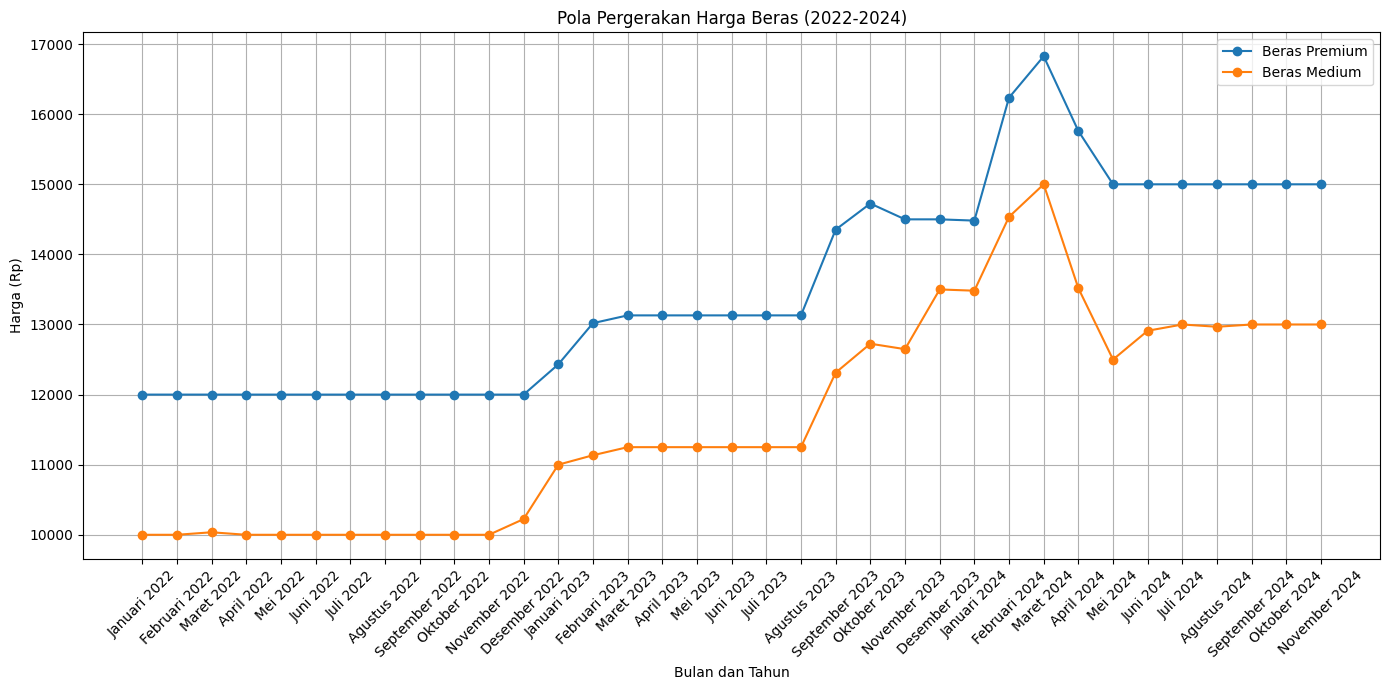

In [17]:
plt.figure(figsize=(14, 7))

for komoditas in ['Beras Premium', 'Beras Medium']:
    komoditas_pola = data_pola[data_pola['komoditas'] == komoditas]
    plt.plot(komoditas_pola['bulan_label'] + " " + komoditas_pola['tahun'].astype(str),
             komoditas_pola['harga'], marker='o', label=f'{komoditas}')

plt.title('Pola Pergerakan Harga Beras (2022-2024)')
plt.xlabel('Bulan dan Tahun')
plt.ylabel('Harga (Rp)')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### **Pada tanggal berapa saja Harga Beras Tertinggi dan Terendah**

Langkah ini bertujuan untuk **menentukan tanggal-tanggal saat harga beras mencapai nilai tertinggi dan terendah** berdasarkan data yang telah dibersihkan. Berikut langkah yang dilakukan:

1. **Harga Tertinggi dan Terendah**:
   - Mengidentifikasi nilai harga maksimum dan minimum untuk masing-masing komoditas (Beras Premium dan Medium).

2. **Filter Data**:
   - Menentukan baris data yang sesuai dengan harga tertinggi dan terendah tersebut. Informasi yang ditampilkan meliputi kolom `komoditas`, `tanggal`, dan `harga`.

3. **Hasil Tabel**:
   - Tabel menampilkan daftar tanggal dengan harga tertinggi dan terendah untuk:
     - **Beras Premium**:
       - Tertinggi: [tanggal, harga]
       - Terendah: [tanggal, harga]
     - **Beras Medium**:
       - Tertinggi: [tanggal, harga]
       - Terendah: [tanggal, harga]

Analisis ini memberikan wawasan tentang momen puncak harga serta nilai terendah harga beras untuk masing-masing jenis selama periode yang dianalisis.

In [18]:
max_price_premium_value = data_transformed_clean[data_transformed_clean['komoditas'] == 'Beras Premium']['harga'].max()
min_price_premium_value = data_transformed_clean[data_transformed_clean['komoditas'] == 'Beras Premium']['harga'].min()
max_price_medium_value = data_transformed_clean[data_transformed_clean['komoditas'] == 'Beras Medium']['harga'].max()
min_price_medium_value = data_transformed_clean[data_transformed_clean['komoditas'] == 'Beras Medium']['harga'].min()

premium_highest = data_transformed_clean[(data_transformed_clean['komoditas'] == 'Beras Premium') &
                                          (data_transformed_clean['harga'] == max_price_premium_value)][['komoditas', 'tanggal', 'harga']]

medium_highest = data_transformed_clean[(data_transformed_clean['komoditas'] == 'Beras Medium') &
                                         (data_transformed_clean['harga'] == max_price_medium_value)][['komoditas', 'tanggal', 'harga']]

premium_lowest = data_transformed_clean[(data_transformed_clean['komoditas'] == 'Beras Premium') &
                                        (data_transformed_clean['harga'] == min_price_premium_value)][['komoditas', 'tanggal', 'harga']]

medium_lowest = data_transformed_clean[(data_transformed_clean['komoditas'] == 'Beras Medium') &
                                       (data_transformed_clean['harga'] == min_price_medium_value)][['komoditas', 'tanggal', 'harga']]

print("Tabel Frekuensi Harga Beras Premium (Harga Tertinggi):")
display(premium_highest)

print("\nTabel Frekuensi Harga Beras Medium (Harga Tertinggi):")
display(medium_highest)

print("\nTabel Frekuensi Harga Beras Premium (Harga Terendah):")
display(premium_lowest)

print("\nTabel Frekuensi Harga Beras Medium (Harga Terendah):")
display(medium_lowest)

Tabel Frekuensi Harga Beras Premium (Harga Tertinggi):


,komoditas,tanggal,harga
1558,Beras Premium,2024-02-19,17000
1560,Beras Premium,2024-02-20,17000
1562,Beras Premium,2024-02-21,17000
1564,Beras Premium,2024-02-22,17000
1566,Beras Premium,2024-02-23,17000
1568,Beras Premium,2024-02-24,17000
1570,Beras Premium,2024-02-25,17000
1572,Beras Premium,2024-02-26,17000
1574,Beras Premium,2024-02-27,17000
1576,Beras Premium,2024-02-28,17000



Tabel Frekuensi Harga Beras Medium (Harga Tertinggi):


,komoditas,tanggal,harga
1545,Beras Medium,2024-02-12,15000
1547,Beras Medium,2024-02-13,15000
1551,Beras Medium,2024-02-15,15000
1553,Beras Medium,2024-02-16,15000
1555,Beras Medium,2024-02-17,15000
1557,Beras Medium,2024-02-18,15000
1559,Beras Medium,2024-02-19,15000
1561,Beras Medium,2024-02-20,15000
1563,Beras Medium,2024-02-21,15000
1565,Beras Medium,2024-02-22,15000



Tabel Frekuensi Harga Beras Premium (Harga Terendah):


,komoditas,tanggal,harga
0,Beras Premium,2022-01-01,12000
2,Beras Premium,2022-01-02,12000
4,Beras Premium,2022-01-03,12000
6,Beras Premium,2022-01-04,12000
8,Beras Premium,2022-01-05,12000
...,...,...,...
728,Beras Premium,2022-12-31,12000
730,Beras Premium,2023-01-01,12000
732,Beras Premium,2023-01-02,12000
734,Beras Premium,2023-01-03,12000



Tabel Frekuensi Harga Beras Medium (Harga Terendah):


,komoditas,tanggal,harga
1,Beras Medium,2022-01-01,10000
3,Beras Medium,2022-01-02,10000
5,Beras Medium,2022-01-03,10000
7,Beras Medium,2022-01-04,10000
9,Beras Medium,2022-01-05,10000
...,...,...,...
683,Beras Medium,2022-12-08,10000
685,Beras Medium,2022-12-09,10000
687,Beras Medium,2022-12-10,10000
689,Beras Medium,2022-12-11,10000


## **Forecasting**

### **Preprocessing Data**

Pada tahap ini, data dipersiapkan untuk proses peramalan harga beras. Langkah-langkah yang dilakukan adalah sebagai berikut:

1. **Pilih Kolom yang Relevan**:
   - Data difokuskan pada kolom `tanggal`, `harga`, dan `komoditas`.

2. **Konversi Tanggal**:
   - Kolom `tanggal` dikonversi ke format **datetime** untuk mendukung analisis berbasis waktu.

3. **Indeks Waktu**:
   - Kolom `tanggal` dijadikan indeks untuk memastikan data terurut secara kronologis, yang diperlukan untuk forecasting.

4. **Pisah Data Berdasarkan Komoditas**:
   - Data dipisahkan menjadi dua subset:
     - **Beras Premium**: Menyimpan data harga untuk komoditas Beras Premium.
     - **Beras Medium**: Menyimpan data harga untuk komoditas Beras Medium.

Langkah preprocessing ini memastikan data siap digunakan untuk metode peramalan berbasis deret waktu.

In [19]:
df = data_transformed_clean[['tanggal', 'harga', 'komoditas']]
df['tanggal'] = pd.to_datetime(df['tanggal'])
df.set_index('tanggal', inplace=True)
df_premium = df[df['komoditas'] == 'Beras Premium'][['harga']]
df_medium = df[df['komoditas'] == 'Beras Medium'][['harga']]

<ipython-input-19-4e719ce3c239>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['tanggal'] = pd.to_datetime(df['tanggal'])


Pada tahap ini, data awal (lima baris pertama) dari subset **df_premium** ditampilkan untuk memeriksa struktur dan isi data. Subset ini berisi data harga dari komoditas *Beras Premium* dengan kolom sebagai berikut:

- **tanggal**: Indeks waktu yang menunjukkan tanggal pengamatan.
- **harga**: Nilai harga beras premium pada tanggal tersebut.

Menampilkan data awal membantu memastikan bahwa data telah terpisah dengan benar dan sesuai untuk langkah analisis selanjutnya.

In [20]:
df_premium.head()

,harga
tanggal,
2022-01-01,12000
2022-01-02,12000
2022-01-03,12000
2022-01-04,12000
2022-01-05,12000


Tahap ini menampilkan lima baris pertama dari subset **df_medium**, yang berisi data harga untuk komoditas *Beras Medium*. Subset ini memiliki kolom berikut:

- **tanggal**: Indeks waktu yang menunjukkan tanggal pengamatan.
- **harga**: Nilai harga beras medium pada tanggal tersebut.

Proses ini bertujuan untuk memverifikasi bahwa data telah dipisahkan dengan benar dan siap untuk analisis atau peramalan lebih lanjut.

In [21]:
df_medium.head()

,harga
tanggal,
2022-01-01,10000
2022-01-02,10000
2022-01-03,10000
2022-01-04,10000
2022-01-05,10000


### **Feature Engineering**

Pada tahap ini, dilakukan penambahan fitur baru untuk mendukung analisis dan peramalan harga beras. Langkah-langkah yang dilakukan adalah:

1. **Fitur Musiman**:
   - Menambahkan kolom `bulan` untuk merepresentasikan bulan dalam tahun (1-12), yang dapat membantu menangkap pola musiman dalam data.
   - Menambahkan kolom `hari_tahun` untuk merepresentasikan hari dalam setahun (1-365/366), yang berguna untuk analisis granular terkait tren harga.

2. **Penambahan pada Subset Data**:
   - Fitur tersebut ditambahkan pada **df_premium** (data Beras Premium).
   - Fitur yang sama juga ditambahkan pada **df_medium** (data Beras Medium).

Fitur-fitur ini dirancang untuk memberikan konteks musiman dan kronologis yang lebih mendalam dalam model peramalan.

In [22]:
df_premium['bulan'] = df_premium.index.month
df_premium['hari_tahun'] = df_premium.index.day_of_year
df_medium['bulan'] = df_medium.index.month
df_medium['hari_tahun'] = df_medium.index.day_of_year

### **Split Data**

Pada tahap ini, data dipisahkan menjadi data latih (*training data*) dan data uji (*testing data*) untuk mendukung proses pelatihan model peramalan harga beras. Berikut langkah-langkahnya:

1. **Fitur dan Target**:
   - Untuk **Beras Premium**, kolom `bulan` dan `hari_tahun` digunakan sebagai fitur (**X_premium**), sementara kolom `harga` sebagai target (**y_premium**).
   - Untuk **Beras Medium**, pendekatan serupa digunakan dengan fitur (**X_medium**) dan target (**y_medium**).

2. **Pemecahan Data**:
   - Data untuk masing-masing komoditas dipisahkan ke dalam dua bagian:
     - **Data Latih** (*Training Data*): 80% dari total data, digunakan untuk melatih model.
     - **Data Uji** (*Testing Data*): 20% dari total data, digunakan untuk evaluasi model.
   - Proses pemisahan dilakukan dengan menggunakan fungsi `train_test_split` dari *library* scikit-learn, dengan parameter `random_state=42` untuk memastikan hasil yang konsisten.

Langkah ini memastikan bahwa model akan dievaluasi secara adil menggunakan data yang belum pernah dilihat selama pelatihan.

In [23]:
X_premium = df_premium[['bulan', 'hari_tahun']]
y_premium = df_premium['harga']
X_medium = df_medium[['bulan', 'hari_tahun']]
y_medium = df_medium['harga']

X_train_premium, X_test_premium, y_train_premium, y_test_premium = train_test_split(
    X_premium, y_premium, test_size=0.2, random_state=42)

X_train_medium, X_test_medium, y_train_medium, y_test_medium = train_test_split(
    X_medium, y_medium, test_size=0.2, random_state=42)

### **Hyperparameter Tuning dengan Grid Search**

Pada tahap ini, dilakukan pencarian kombinasi parameter terbaik untuk model Random Forest menggunakan metode **Grid Search**. Beberapa parameter yang disiapkan dalam grid adalah:

1. **Jumlah Pohon (*n_estimators*)**:
   - Nilai yang dipertimbangkan: 100, 200, dan 300.
   - Parameter ini menentukan jumlah pohon keputusan yang akan dibangun oleh model.

2. **Kedalaman Maksimal Pohon (*max_depth*)**:
   - Nilai yang dipertimbangkan: Tidak terbatas (*None*), 10, 20, dan 30.
   - Parameter ini mengatur seberapa dalam setiap pohon dapat tumbuh.

3. **Minimum Sampel untuk Membagi Node (*min_samples_split*)**:
   - Nilai yang dipertimbangkan: 2, 5, dan 10.
   - Parameter ini menentukan jumlah minimum sampel yang diperlukan untuk membagi suatu node.

4. **Minimum Sampel di Daun (*min_samples_leaf*)**:
   - Nilai yang dipertimbangkan: 1, 2, dan 4.
   - Parameter ini mengatur jumlah minimum sampel yang harus ada di daun keputusan.

5. **Jumlah Fitur yang Digunakan pada Setiap Split (*max_features*)**:
   - Nilai yang dipertimbangkan: `auto` (semua fitur), `sqrt` (akar kuadrat dari jumlah fitur), dan `log2` (logaritma basis 2 dari jumlah fitur).
   - Parameter ini menentukan berapa banyak fitur yang dipertimbangkan pada setiap pemisahan.

Metode ini akan mengevaluasi semua kombinasi parameter dalam grid dan memilih kombinasi yang memberikan performa terbaik berdasarkan metrik evaluasi yang telah ditentukan.

In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2'],
}

### **Inisialisasi Model RandomForest**

Model **Random Forest Regressor** diinisialisasi untuk masing-masing data komoditas:

1. **`rf_premium`**: Model untuk memprediksi harga **Beras Premium**.
2. **`rf_medium`**: Model untuk memprediksi harga **Beras Medium**.

Parameter `random_state` diset ke nilai 42 untuk memastikan hasil yang konsisten dan reprodusibilitas selama pelatihan.

In [25]:
rf_premium = RandomForestRegressor(random_state=42)
rf_medium = RandomForestRegressor(random_state=42)

### **Inisialisasi GridSearchCV**

**GridSearchCV** digunakan untuk melakukan pencarian hyperparameter terbaik berdasarkan grid yang telah didefinisikan sebelumnya. Proses ini diterapkan pada masing-masing model:

1. **`grid_search_premium`**:
   - Model: **Random Forest Regressor** untuk **Beras Premium**.
   - Parameter grid: Kombinasi parameter yang telah didefinisikan pada `param_grid`.
   - Cross-validation: 5 fold (`cv=5`).
   - Metode evaluasi: **Negative Mean Squared Error** (`scoring='neg_mean_squared_error'`).
   - Paralelisme: Menggunakan semua core prosesor yang tersedia (`n_jobs=-1`).

2. **`grid_search_medium`**:
   - Model: **Random Forest Regressor** untuk **Beras Medium**.
   - Memiliki konfigurasi yang sama seperti **`grid_search_premium`**.

Proses ini akan mengevaluasi semua kombinasi parameter dalam grid untuk menentukan konfigurasi terbaik berdasarkan performa model pada data validasi.

In [26]:
grid_search_premium = GridSearchCV(estimator=rf_premium, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)
grid_search_medium = GridSearchCV(estimator=rf_medium, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

### **Mencari Parameter Terbaik**

Setelah menginisialisasi **GridSearchCV**, proses pencarian parameter terbaik dilakukan dengan melatih model menggunakan data pelatihan:

1. **Grid Search untuk Beras Premium**:
   - Metode **`fit()`** digunakan pada objek **`grid_search_premium`**, yang melatih model dengan berbagai kombinasi hyperparameter pada data pelatihan **`X_train_premium`** dan target **`y_train_premium`**.

2. **Grid Search untuk Beras Medium**:
   - Metode **`fit()`** juga diterapkan pada objek **`grid_search_medium`**, menggunakan data pelatihan **`X_train_medium`** dan target **`y_train_medium`**.

Proses ini akan mengevaluasi performa model dengan kombinasi hyperparameter yang berbeda, menggunakan **cross-validation**, untuk menentukan konfigurasi yang memberikan error terkecil (dalam metrik Negative Mean Squared Error).

In [27]:
grid_search_premium.fit(X_train_premium, y_train_premium)
grid_search_medium.fit(X_train_medium, y_train_medium)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=2)

### **Menampilkan Parameter Terbaik**

Setelah melakukan proses *hyperparameter tuning* menggunakan **GridSearchCV**, langkah selanjutnya adalah menampilkan kombinasi parameter terbaik yang ditemukan untuk model prediksi harga beras premium dan medium.

Parameter ini dipilih berdasarkan konfigurasi yang menghasilkan kesalahan prediksi terendah menggunakan metrik *neg_mean_squared_error*. Kombinasi parameter terbaik ini akan digunakan untuk melatih model secara lebih optimal, sehingga dapat meningkatkan akurasi dalam memprediksi harga beras.

Berikut adalah hasil parameter terbaik untuk masing-masing model:

In [28]:
print("Best parameters for Premium Model:", grid_search_premium.best_params_)
print("Best parameters for Medium Model:", grid_search_medium.best_params_)

Best parameters for Premium Model: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best parameters for Medium Model: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


### **Gunakan Model dengan Parameter Terbaik**

Setelah mendapatkan kombinasi parameter terbaik melalui proses *hyperparameter tuning* dengan **GridSearchCV**, langkah selanjutnya adalah membangun model menggunakan parameter tersebut.

Model ini dioptimalkan untuk memberikan hasil prediksi terbaik berdasarkan parameter seperti jumlah pohon dalam hutan (*n_estimators*), kedalaman maksimum pohon (*max_depth*), jumlah fitur yang digunakan untuk setiap split (*max_features*), dan parameter lainnya.

Berikut adalah model yang digunakan:
- **Model Beras Premium:** Model yang telah dioptimalkan dengan parameter terbaik untuk memprediksi harga beras premium.
- **Model Beras Medium:** Model yang telah dioptimalkan dengan parameter terbaik untuk memprediksi harga beras medium.

Model ini siap digunakan untuk melatih data dan melakukan prediksi dengan akurasi yang lebih baik.

In [29]:
model_premium_optimized = grid_search_premium.best_estimator_
model_medium_optimized = grid_search_medium.best_estimator_

### **Latih Model dengan Parameter Terbaik**

Setelah menentukan parameter terbaik melalui proses **GridSearchCV**, langkah berikutnya adalah melatih model menggunakan data pelatihan. Proses pelatihan ini bertujuan agar model dapat mengenali pola hubungan antara fitur dan target berdasarkan parameter yang telah dioptimalkan.

Model yang dilatih meliputi:
- **Model Beras Premium:** Dilatih menggunakan data pelatihan untuk memprediksi harga beras premium.
- **Model Beras Medium:** Dilatih menggunakan data pelatihan untuk memprediksi harga beras medium.

Hasil pelatihan ini akan menghasilkan model yang lebih akurat untuk digunakan dalam proses prediksi selanjutnya.

In [30]:
model_premium_optimized.fit(X_train_premium, y_train_premium)
model_medium_optimized.fit(X_train_medium, y_train_medium)

RandomForestRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, random_state=42)

Setelah melalui proses **GridSearchCV**, model **Random Forest Regressor** telah dioptimalkan untuk memprediksi harga beras. Parameter terbaik yang ditemukan adalah sebagai berikut:

- **Beras Premium:**
  - `max_depth`: 10
  - `max_features`: 'sqrt'
  - `min_samples_leaf`: 4
  - `min_samples_split`: 10
  - `random_state`: 42

- **Beras Medium:**
  - Parameter yang sama diterapkan untuk model ini karena hasil optimasi menunjukkan performa terbaik dengan konfigurasi yang serupa.

Model dengan parameter di atas dilatih menggunakan data pelatihan dan siap digunakan untuk evaluasi dan prediksi.

### **Model Evaluation**

Untuk mengukur performa model **Random Forest Regressor** yang telah dioptimalkan, digunakan metrik **Root Mean Squared Error (RMSE)**. Metrik ini mengukur tingkat kesalahan antara nilai prediksi model dengan nilai aktual pada data uji.

- **Hasil Evaluasi Model:**
  - **RMSE untuk Beras Premium:**  
    Nilai RMSE menunjukkan tingkat akurasi model dalam memprediksi harga beras premium berdasarkan data uji.
    
  - **RMSE untuk Beras Medium:**  
    Nilai RMSE menunjukkan tingkat akurasi model dalam memprediksi harga beras medium berdasarkan data uji.

Semakin kecil nilai RMSE, semakin baik performa model dalam melakukan prediksi. Hasil ini memberikan gambaran awal untuk menganalisis keandalan model sebelum digunakan untuk prediksi masa depan.

In [31]:
y_pred_premium = model_premium_optimized.predict(X_test_premium)
print("RMSE for Premium Model:", np.sqrt(mean_squared_error(y_test_premium, y_pred_premium)))

y_pred_medium = model_medium_optimized.predict(X_test_medium)
print("RMSE for Medium Model:", np.sqrt(mean_squared_error(y_test_medium, y_pred_medium)))

RMSE for Premium Model: 1602.8469155177402
RMSE for Medium Model: 1646.846614098096


Nilai Root Mean Squared Error (RMSE) menunjukkan tingkat kesalahan prediksi model. Dalam kasus ini, RMSE Beras Premium = 1602.84 dan RMSE Beras Medium = 1646.84 memiliki arti sebagai berikut:


1.   RMSE adalah rata-rata akar kuadrat dari kesalahan prediksi, yang diukur dalam satuan yang sama dengan target (dalam hal ini Rupiah).
2.   RMSE Premium (1602.84): Prediksi harga beras premium rata-rata meleset sebesar ±Rp 1,602.84 dari harga sebenarnya.
2.   RMSE Medium (1646.84): Prediksi harga beras medium rata-rata meleset sebesar ±Rp 1,646.84 dari harga sebenarnya.

### **Testing**

Fungsi `plot_price_trend_dual_input()` ini memungkinkan pengguna untuk memasukkan rentang tanggal secara interaktif untuk memprediksi harga beras premium dan medium selama periode tersebut. Berikut adalah penjelasan tentang bagaimana fungsi ini bekerja:

1. **Input Tanggal oleh Pengguna**:
   Fungsi dimulai dengan meminta pengguna untuk memasukkan dua tanggal: tanggal mulai dan tanggal akhir, yang diinput dalam format `YYYY-MM-DD`. Tanggal ini akan menentukan rentang waktu yang akan dianalisis untuk memprediksi harga beras.

2. **Validasi Format Tanggal**:
   - Setelah tanggal dimasukkan, fungsi akan memeriksa apakah format tanggal yang dimasukkan valid. Jika format tanggal tidak sesuai, program akan menampilkan pesan kesalahan yang memberitahukan pengguna untuk memasukkan tanggal dalam format yang benar.

3. **Rentang Tanggal dan Fitur untuk Prediksi**:
   - Jika tanggal valid, rentang tanggal tersebut digunakan untuk membuat daftar tanggal dalam rentang waktu yang dipilih menggunakan `pd.date_range()`.
   - Fitur-fitur yang diperlukan untuk prediksi, yaitu bulan dan hari dalam tahun, diekstrak dari rentang tanggal dan dimasukkan dalam bentuk DataFrame. Fitur-fitur ini akan digunakan oleh model untuk memprediksi harga beras.

4. **Prediksi Harga Beras Premium dan Medium**:
   - Model Random Forest yang telah dioptimalkan (`model_premium_optimized` untuk Beras Premium dan `model_medium_optimized` untuk Beras Medium) digunakan untuk memprediksi harga kedua jenis beras berdasarkan fitur bulan dan hari dalam tahun.

5. **Visualisasi Hasil Prediksi**:
   - Hasil prediksi untuk harga beras premium dan medium selama rentang waktu yang dimasukkan dipetakan dalam grafik. Grafik ini menggambarkan tren harga kedua jenis beras dalam rentang tanggal yang dipilih.
   - Grafik yang dihasilkan memiliki sumbu X untuk tanggal dan sumbu Y untuk harga beras dalam satuan Rupiah (Rp).

6. **Penanganan Kesalahan**:
   - Jika ada kesalahan dalam format tanggal, fungsi akan menangani hal tersebut dengan menampilkan pesan kesalahan yang sesuai, memberikan kesempatan bagi pengguna untuk memperbaiki input mereka.

7. **Keuntungan Fungsi**:
   - **Interaktivitas**: Pengguna dapat dengan bebas memasukkan rentang tanggal yang diinginkan untuk analisis harga beras.
   - **Visualisasi Prediksi**: Fungsi ini menghasilkan grafik visual yang jelas, memudahkan pemahaman terhadap tren harga selama periode yang dipilih.
   - **Prediksi Akurat**: Fungsi menggunakan model yang sudah dioptimalkan, memberikan prediksi harga berdasarkan data yang relevan.

---

Dengan fungsi ini, pengguna bisa mengeksplorasi berbagai rentang waktu dan mendapatkan wawasan mengenai tren harga beras premium dan medium di masa depan berdasarkan model yang sudah terlatih dan dioptimalkan.

Masukkan tanggal mulai (YYYY-MM-DD): 2025-01-01
Masukkan tanggal akhir (YYYY-MM-DD): 2025-08-16


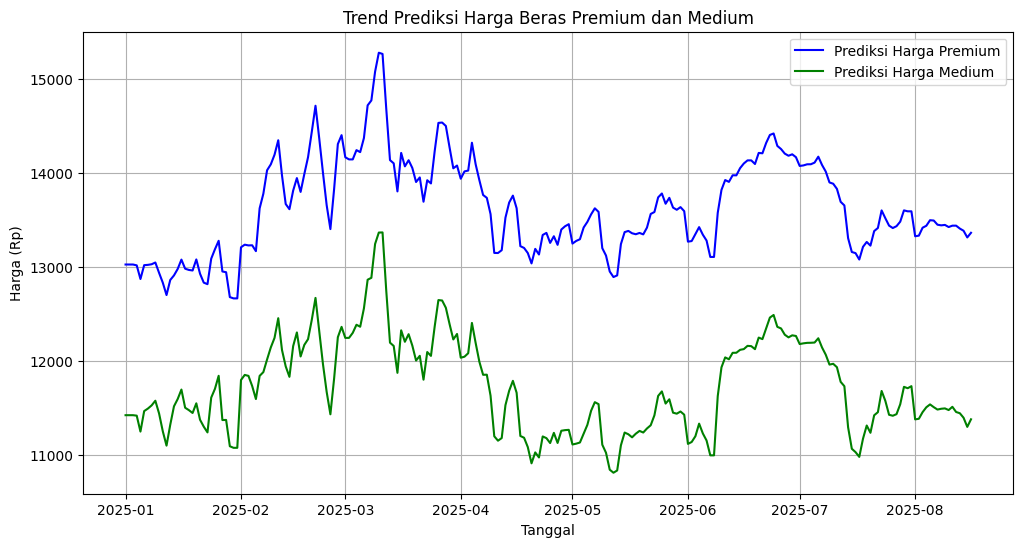

In [32]:
def plot_price_trend_dual_input():
    start_date = input("Masukkan tanggal mulai (YYYY-MM-DD): ")
    end_date = input("Masukkan tanggal akhir (YYYY-MM-DD): ")

    try:
        pd.to_datetime(start_date)
        pd.to_datetime(end_date)

        date_range = pd.date_range(start=start_date, end=end_date)

        features = pd.DataFrame({
            'bulan': date_range.month,
            'hari_tahun': date_range.day_of_year
        })

        predicted_prices_premium = model_premium_optimized.predict(features)
        predicted_prices_medium = model_medium_optimized.predict(features)

        plt.figure(figsize=(12, 6))
        plt.plot(date_range, predicted_prices_premium, label='Prediksi Harga Premium', color='blue')
        plt.plot(date_range, predicted_prices_medium, label='Prediksi Harga Medium', color='green')
        plt.title('Trend Prediksi Harga Beras Premium dan Medium')
        plt.xlabel('Tanggal')
        plt.ylabel('Harga (Rp)')
        plt.grid(True)
        plt.legend()
        plt.show()

    except ValueError:
        print("Format tanggal tidak valid. Harap masukkan dalam format YYYY-MM-DD.")

plot_price_trend_dual_input()

Fungsi `predict_price_input()` bertujuan untuk menerima input tanggal dan jenis beras dari pengguna, melakukan prediksi harga menggunakan model yang telah dilatih, dan kemudian menampilkan hasilnya dalam format yang mudah dibaca. Berikut adalah penjelasan langkah demi langkah dari kode ini:

1. **Input Pengguna**
   - Fungsi dimulai dengan meminta pengguna untuk memasukkan dua input:
     - **Tanggal** dalam format `YYYY-MM-DD`.
     - **Jenis Beras**, yang dapat dipilih antara 'Premium' atau 'Medium'.
   - Fungsi memeriksa apakah jenis beras yang dimasukkan valid (hanya 'Premium' atau 'Medium'). Jika tidak, fungsi akan menampilkan pesan kesalahan dan menghentikan eksekusi lebih lanjut.

2. **Validasi Tanggal**
   - Selanjutnya, fungsi mencoba untuk mengonversi tanggal yang dimasukkan menjadi format ordinal menggunakan `pd.to_datetime()`. Format ordinal ini digunakan karena lebih mudah untuk diproses oleh model.
   - Jika format tanggal tidak sesuai atau tidak valid, sebuah pengecualian (`ValueError`) akan ditangani, dan pengguna akan diminta untuk memastikan tanggal dalam format yang benar.

3. **Membuat Fitur Tambahan: Hari dalam Minggu**
   - Fungsi ini juga menghitung **hari dalam minggu** dari tanggal yang dimasukkan menggunakan `weekday()`, yang menghasilkan angka antara 0 hingga 6 (0 untuk Senin dan 6 untuk Minggu). Ini adalah fitur tambahan yang akan digunakan dalam prediksi harga.

4. **Prediksi Harga Beras**
   - Berdasarkan input jenis beras, fungsi memilih model yang sesuai dan melakukan prediksi harga menggunakan fitur yang telah disiapkan (`date_ordinal` dan `day_of_week`).
   - Model yang digunakan:
     - `model_premium_optimized` untuk jenis beras 'Premium'.
     - `model_medium_optimized` untuk jenis beras 'Medium'.
   
5. **Menampilkan Hasil Prediksi**
   - Setelah melakukan prediksi harga, fungsi mengonversi hasil prediksi ke dalam format yang lebih mudah dibaca, yaitu dalam bentuk Rupiah dengan pemisah ribuan.
   - Fungsi kemudian menampilkan hasil prediksi dalam format berikut:
     - Jenis Beras
     - Tanggal input
     - Prediksi harga dalam format mata uang (Rp).

6. **Penggunaan Fungsi**
   - Fungsi ini dipanggil dengan `predict_price_input()`, yang memungkinkan pengguna untuk memasukkan input secara interaktif dan menerima prediksi harga beras sesuai dengan tanggal yang dimasukkan.

In [33]:
def predict_price_input():
    tanggal_input = input("Masukkan tanggal (YYYY-MM-DD): ")
    beras_input = input("Masukkan jenis beras (Premium/Medium): ")

    if beras_input not in ['Premium', 'Medium']:
        print("Jenis beras tidak valid. Pilih 'Premium' atau 'Medium'.")
        return

    try:
        date_ordinal = pd.to_datetime(tanggal_input).toordinal()
    except ValueError:
        print("Format tanggal tidak valid. Harap masukkan dalam format YYYY-MM-DD.")
        return

    day_of_week = pd.to_datetime(tanggal_input).weekday()
    input_features = [[date_ordinal, day_of_week]]

    if beras_input == 'Premium':
        pred_price = model_premium_optimized.predict(input_features)
    elif beras_input == 'Medium':
        pred_price = model_medium_optimized.predict(input_features)

    formatted_price = f"Rp {round(pred_price[0], 0):,}"

    print(f"\nJenis Beras : {beras_input}")
    print(f"Tanggal : {tanggal_input}")
    print(f"Prediksi Harga : {formatted_price}")

predict_price_input()

Masukkan tanggal (YYYY-MM-DD): 2025-03-04
Masukkan jenis beras (Premium/Medium): Premium

Jenis Beras : Premium
Tanggal : 2025-03-04
Prediksi Harga : Rp 13,358.0
